# Điều chế ASK


<h2>1.</h1>
<li>Tạo và vẽ tín hiệu nhị phân</li>
<li>Tạo và vẽ tín hiệu sóng mang</li>
<li>Điều chế và vẽ tín hiệu điều chế</li>

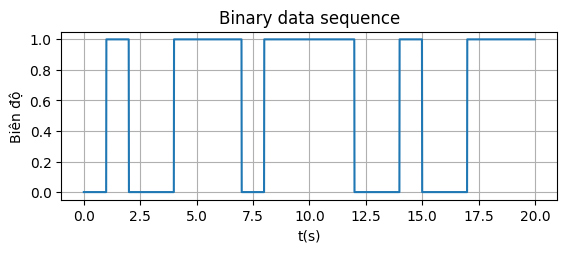

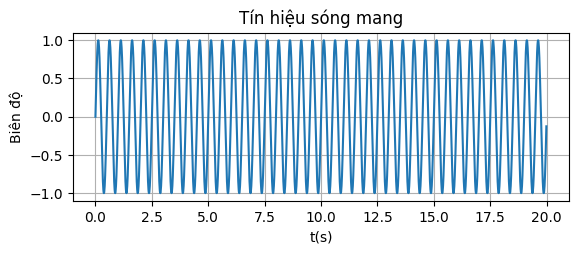

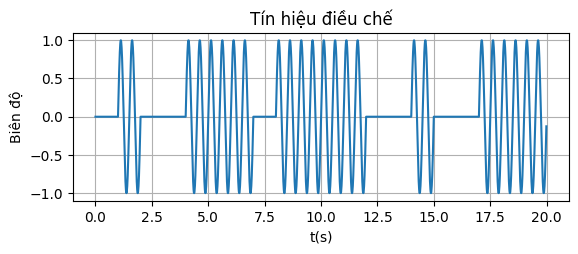

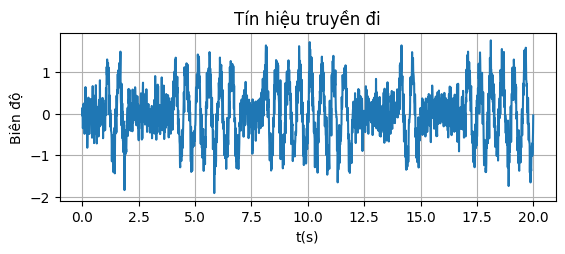

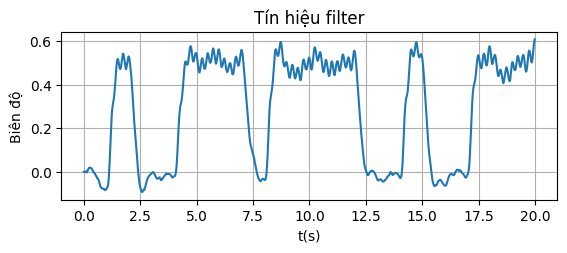

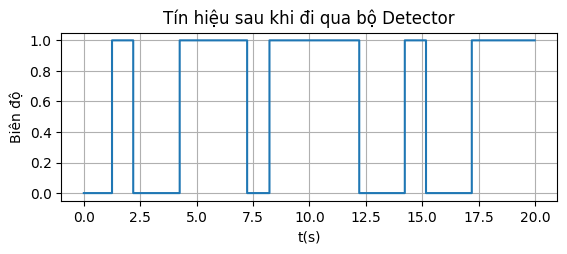

In [233]:
from scipy.signal import butter, filtfilt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
n = 20
T = 0.01 # chia thời gian thật thành các khoảng thời gian T để xử lý
x = np.arange(n) 
bits_sequence = np.random.choice([0, 1], n)
size = int((n)/T) # Số mẫu thu được khi thu tín hiệu và phân tích tín hiệu
time = np.arange(0.0, n, T)
nt = np.arange(time.size)
# So sánh tín hiệu các bit theo thời gian lấy mẫu
for j in np.arange(time.size):
    nt[j] = bits_sequence[int(time[j])]

# Biểu diễn các đồ thị
plt.figure()
plt.subplot(212)
# Đồ thị biểu diễn chuỗi tín hiệu nhị phân
plt.xlabel("t(s)")
plt.ylabel("Biên độ")
plt.title("Binary data sequence")
plt.grid(True)
plt.plot(time, nt)
# Đồ thị biểu diễn tín hiệu sóng mang
plt.figure()
plt.subplot(212)


#  Chỉnh lại tần số lấy mẫu phải lớn hơn 2 lần tần số tín hiệu nhận
# chu kỳ lấy mẫu là 0.01 vậy thì
# Tần số lấy mẫu phải lớn hơn 2 lần tần số tín hiệu thu được
# Chu kỳ lấy mẫu phải nhỏ hơn 2 lần chu kỳ của tín hiệu 
sin_t = np.sin(4*np.pi*time)
plt.xlabel("t(s)")
plt.ylabel("Biên độ")
plt.title("Tín hiệu sóng mang")
plt.plot(time, sin_t)
plt.grid(True)

# Đồ thị tín hiệu điều chế tín hiệu
plt.figure()
plt.subplot(212)
plt.xlabel("t(s)")
plt.ylabel("Biên độ")
plt.title("Tín hiệu điều chế")
plt.plot(time, nt*sin_t)
plt.grid(True)

# Tạo nhiễu gaussian ngẫu nhiên bằng hàm có sẵn
N0 = 0.2
mean = 0
variance = np.sqrt(N0/2)
noise = np.random.normal(mean, variance, size)



def ASK_demodulation(modulated_signal_with_noise, carrier_signal):
    cross_correlation = np.correlate(modulated_signal_with_noise, carrier_signal, 'same')
    decision_variable = [1 if x >= 0 else 0 for x in cross_correlation]
    return decision_variable
# Tín hiệu nhận được sẽ là tín hiệu truyền đi từ bên phát cộng với nhiễu gaussian

transmission_signal = nt*sin_t
transmission_signal_with_noise = transmission_signal+noise
plt.figure()
plt.subplot(212)
plt.xlabel("t(s)")
plt.ylabel("Biên độ")
plt.title("Tín hiệu truyền đi")
plt.plot(time, transmission_signal_with_noise)
plt.grid(True)
# -----------------
demodulated_signal = ASK_demodulation(transmission_signal, sin_t)


def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

def get_demodulated_signal (filtered_signal):
    demodulated_binary_signal = [1 if x > np.mean(
        filtered_signal) else 0 for x in filtered_signal]
    return np.array(demodulated_binary_signal)

fs = 1/T
nyq = 0.5*fs
cutoff = 10
order = 2
R = 5
lpf = 1./math.sqrt(T)*np.ones(R)
detector = transmission_signal_with_noise*sin_t
filter_signal = butter_lowpass_filter(detector, cutoff/10, fs, order)
demodulated_signal = get_demodulated_signal(filter_signal)

plt.figure()
plt.subplot(212)
plt.xlabel("t(s)")
plt.ylabel("Biên độ")
plt.title("Tín hiệu filter")
plt.plot(time, filter_signal)
plt.grid(True)
# ----------------------------------------------
plt.figure()
plt.subplot(212)
plt.step(time, demodulated_signal)
plt.xlabel("t(s)")
plt.ylabel("Biên độ")
plt.title("Tín hiệu sau khi đi qua bộ Detector")
plt.grid(True)
plt.show()

